## MNIST数据简介

MNIST数据集是一个手写体数据集，简单说就是一堆这样东西
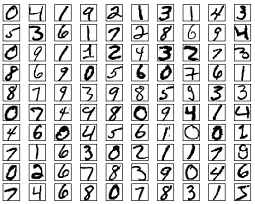

MNIST 数据集可在 http://yann.lecun.com/exdb/mnist/ 获取, 它包含了四个部分:

* Training set images: train-images-idx3-ubyte.gz (包含 60,000 个样本)
* Training set labels: train-labels-idx1-ubyte.gz (包含 60,000 个标签)
* Test set images: t10k-images-idx3-ubyte.gz (包含 10,000 个样本)
* Test set labels: t10k-labels-idx1-ubyte.gz (包含 10,000 个标签)

MNIST 数据集来自美国国家标准与技术研究所, National Institute of Standards and Technology (NIST). 训练集 (training set) 由来自 250 个不同人手写的数字构成, 其中 50% 是高中学生, 50% 来自人口普查局 (the Census Bureau) 的工作人员. 测试集(test set) 也是同样比例的手写数字数据.

## 一、导入函数库

In [40]:
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## 二、下载数据集（训练集/测试集）

In [10]:
# 载入训练集
train_dataset = datasets.MNIST(root='./data/06_MNIST/', # 这个地址需要自己指定
                               train=True, # 载入训练集
                               transform=transforms.ToTensor(), # 转变为tensor数据
                               download=True)       # 下载数据
#载入测试集
test_dataset = datasets.MNIST(root='./data/06_MNIST/',
                               train=False, # 载入测试集
                               transform=transforms.ToTensor(), # 转变为tensor数据
                               download=True)       # 下载数据

## 三、绘图查看手写图片

In [35]:
print(train_dataset.data.size())
print(train_dataset.data[0].size())

torch.Size([60000, 28, 28])
torch.Size([28, 28])


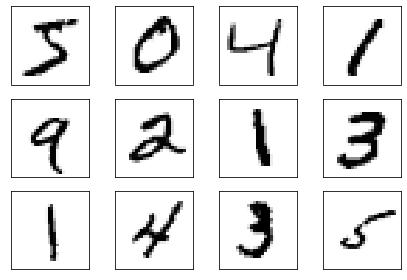

In [39]:
fig, ax = plt.subplots(
    nrows=3,
    ncols=4,
    sharex=True,
    sharey=True, )

ax = ax.flatten()

for i in range(12):
    # 只查看了前面12张图片
    img = train_dataset.data[i]
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## 四、数据装载

In [11]:
# 设置批次大小（每次传入数据量）
batch_size = 64

# 装载数据集
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size, #每批数据的大小
                          shuffle=True) # shuffle表示打乱数据
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_size, #每批数据的大小
                          shuffle=True) # shuffle表示打乱数据

## 查看数据格式：
for i,data in enumerate(train_loader):
    inputs,labels = data
    print(labels.shape)
    print(inputs.shape)
    break
    
result:
    torch.Size([64])
    torch.Size([64, 1, 28, 28]) #64 表示64张图，1表示图片通道为黑白的，28,28表示每张图片的像素大小

In [13]:
for i,data in enumerate(train_loader):
    inputs,labels = data
    print(labels.shape)
    print(inputs.shape)
    break

torch.Size([64])
torch.Size([64, 1, 28, 28])


In [14]:
len(train_loader)

938

## 五、定义网络结构

In [15]:
#定义网络结构
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(784,10)
        self.softmax = nn.Softmax(dim=1) #dim=1表示对第一个维度求概率（64,10）的数组，其第一个维度表示10
    
    def forward(self,x):
        # 得到的数据格式torch.Size([64, 1, 28, 28])需要转变为（64,784）
        x = x.view(x.size()[0],-1) # -1表示自动匹配
        x = self.fc1(x)
        x = self.softmax(x)
        return x

## 六、模型定义

In [16]:
# 定义模型
model = Net()

#定义代价函数
mse_loss = nn.MSELoss()

#定义优化器
LR=0.5 #学习率
optimizer = optim.SGD(model.parameters(),lr=LR)

## 七、模型训练

In [23]:
def train_model():
    for i,data in enumerate(train_loader):
        # 循环一次获得一批次的数据与标签
        inputs, labels = data
        
        # 获得模型预测结果
        out = model(inputs)
        # to onehot,把数据标签变为独热编码
        labels = labels.reshape(-1,1) # 将一维数据变为二维数据（64）->(64,1)
        one_hot= torch.zeros(inputs.shape[0],10).scatter(1,labels,1)
        # tensor.scatter(dim,index,src):dim表示对哪一维进行独热编码
        # index表示要将src中对应的值放入到tensor中的哪个位置
        # src：插入index的数值
        
        #计算loss,mse_loss输入的两个数据的shape要一致
        loss = mse_loss(out,one_hot)
        
        # 梯度清零
        optimizer.zero_grad()
        # 计算梯度
        loss.backward()
        # 修改权值
        optimizer.step()
        
def test_model():
    correct = 0
    for i,data in enumerate(test_loader):
        # 获取一批次的数据
        inputs, labels = data
        # 预测结果
        out = model(inputs)
        # 获得最大值即最大值所在的位置
        _,predicted = torch.max(out,1)
        # 对比预测结果与标签（累积预测正确的数量）
        correct += (predicted==labels).sum()   
    print("Test acc:{0}".format(correct.item()/len(test_dataset)))

In [24]:
for epoch in range(10):
    print('epoch:',epoch)
    train_model()
    test_model()
    

epoch: 0
Test acc:0.9055
epoch: 1
Test acc:0.9087
epoch: 2
Test acc:0.9115
epoch: 3
Test acc:0.9141
epoch: 4
Test acc:0.9167
epoch: 5
Test acc:0.9179
epoch: 6
Test acc:0.9188
epoch: 7
Test acc:0.92
epoch: 8
Test acc:0.92
epoch: 9
Test acc:0.9212
